### Feature Selection

In this notebook
- try various standard ML algorithms on a numeric dataset
- attempt correaltion based feature selection
- add feature selection into pipeline

In [75]:
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

np.random.seed(123)

# Import four machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from copy import deepcopy

In [3]:
#use standard function to test each method 
def get_best_model_and_accuracy(model,params,x,y):
    grid = GridSearchCV(model,params,error_score=0.)
    grid.fit(X,y)
    print("Best accuracy: {}".format(grid.best_score_))
    print("Best parameters: {}".format(grid.best_params_))
    print("Average time to Fit(s): {}".format(round(grid.cv_results_['mean_fit_time'].mean(),3)))
    print("Average Time to Score (s):{}".format(round(grid.cv_results_['mean_score_time'].mean(), 3)))


In [4]:
#use credit card datset
#archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
credit_card_default = pd.read_csv('data\\credit_card_default.csv')

In [5]:
credit_card_default.shape

(30000, 24)

In [6]:
credit_card_default.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


In [92]:
credit_card_default.dtypes

#default payment next month is response variable

LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [8]:
#any null values in all the columns
credit_card_default.isnull().sum().sum()

0

In [9]:
#create the feature matrix
X = credit_card_default.iloc[:,:-1]
print(X.columns)
y = credit_card_default.iloc[:,-1]
print(y.shape,'\n',y[:10])

target = credit_card_default['default payment next month']


Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')
(30000,) 
 0    1
1    1
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: default payment next month, dtype: int64


In [10]:
#get the baseline accuracy - people who did not default(0), people who did(1)
y.value_counts(normalize=True)*100

0    77.88
1    22.12
Name: default payment next month, dtype: float64

## Generating baseline models

Use some standard ML algorithms.  No usual standardisation applied here

In [11]:
# Set up some parameters for our grid search
# We will start with four different machine learning model parameters
# Logistic Regression
lr_params = {'C':[1e-1, 1e0, 1e1, 1e2], 'penalty':['l1', 'l2']}
# KNN
knn_params = {'n_neighbors': [1, 3, 5, 7]}
# Decision Tree
tree_params = {'max_depth':[None, 1, 3, 5, 7]}
# Random Forest
forest_params = {'n_estimators': [10, 50, 100], 'max_depth': [None, 1, 3,5, 7]}


In [12]:
# instantiate the four machine learning models
lr = LogisticRegression()
knn = KNeighborsClassifier()
d_tree = DecisionTreeClassifier()
forest = RandomForestClassifier()

In [13]:
#Try the basline methods using function defined above, number to beat is 77.88 percent baseline null accuracy

#LogR
get_best_model_and_accuracy(lr, lr_params, X, y)

Best accuracy: 0.8095333333333333
Best parameters: {'C': 0.1, 'penalty': 'l1'}
Average time to Fit(s): 0.45
Average Time to Score (s):0.001


In [14]:
#KNN
get_best_model_and_accuracy(knn, knn_params, X, y)


Best accuracy: 0.7602333333333333
Best parameters: {'n_neighbors': 7}
Average time to Fit(s): 0.031
Average Time to Score (s):0.522


KNN gives worse accuracy then LogR - the data has not been standardised - needed for euclidean distance.  Less time to fit though as only has to store data but then retrieve at prediction time

Lets try standardising the data in pipeline

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

knn_pipe_params = {'classifier__{}'.format(k): v for k, v in knn_params.items()}

# KNN requires a standard scalar due to using Euclidean distance
knn_pipe = Pipeline([('scale', StandardScaler()), ('classifier', knn)])

# quick to fit, very slow to predict
get_best_model_and_accuracy(knn_pipe, knn_pipe_params, X, y)

Best accuracy: 0.8008
Best parameters: {'classifier__n_neighbors': 7}
Average time to Fit(s): 0.04
Average Time to Score (s):4.545


Better results in accuracy terms after scaling but added to predicting time - logistic regression better so far

In [16]:
#Try a baseline decision tree
get_best_model_and_accuracy(d_tree, tree_params, X, y)

Best accuracy: 0.8202666666666667
Best parameters: {'max_depth': 3}
Average time to Fit(s): 0.126
Average Time to Score (s):0.0


Decision Tree is best so far.  Lets try the more powerful random forest algorithm

In [17]:
get_best_model_and_accuracy(forest, forest_params, X, y)

Best accuracy: 0.8195666666666667
Best parameters: {'max_depth': 7, 'n_estimators': 50}
Average time to Fit(s): 0.804
Average Time to Score (s):0.037


Better than LR and KNN but not better than DT.  
**Let's make a table!!!!**

| Model Name | Accuracy(%) | Fit Time (s) | Predict Time (s)
| --- | --- | --- | --- |
| Logistic Regression | 0.8095 | 0.412 | 0.002
| KNN (with scaling) | 0.8008 | 0.047 | 4.606
| Decision Tree  | 0.8203 | 0.122 | 0.002
| Random Forest | 0.8196 | 0.808 | 0.039

Lets stick with the DT 

## Feature Selection

Lets try statistical and model-based selection

### Statistical
Try Pearson correlations and hypothesis testing
Both univariate methods of feature selection, quick and handy when the problem is to select out single features at a time in order to create a better dataset for our machine learning pipeline.

In [18]:
#k = 10 #number of variables for heatmap
#corrmat = X.corr()
#cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
#cm = np.corrcoef(X.values.T)
#sns.set(font_scale=1.25)
#hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12},
#                 yticklabels=X.values, xticklabels=X.values)
#plt.show()

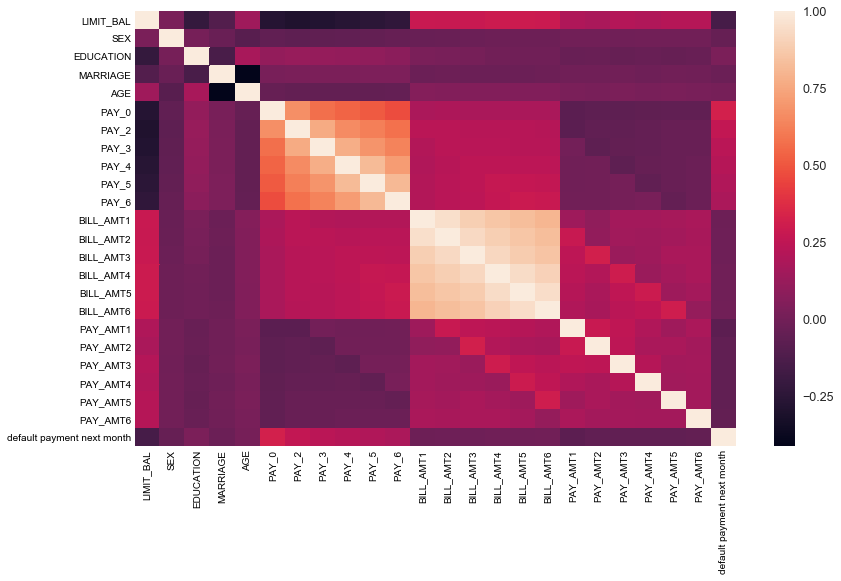

In [19]:
fig, ax = plt.subplots(figsize=(12,8)); 
sns.set(font_scale=1.25);
sns.heatmap(credit_card_default.corr());

In [23]:
# just correlations between every feature and the response
credit_card_default.corr()['default payment next month']

LIMIT_BAL                    -0.153520
SEX                          -0.039961
EDUCATION                     0.028006
MARRIAGE                     -0.024339
AGE                           0.013890
PAY_0                         0.324794
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
BILL_AMT1                    -0.019644
BILL_AMT2                    -0.014193
BILL_AMT3                    -0.014076
BILL_AMT4                    -0.010156
BILL_AMT5                    -0.006760
BILL_AMT6                    -0.005372
PAY_AMT1                     -0.072929
PAY_AMT2                     -0.058579
PAY_AMT3                     -0.056250
PAY_AMT4                     -0.056827
PAY_AMT5                     -0.055124
PAY_AMT6                     -0.053183
default payment next month    1.000000
Name: default payment next month, dtype: float64

In [24]:
# filter only correlations stronger than .2 in either direction (positiveor negative)
credit_card_default.corr()['default payment next month'].abs() > .2

LIMIT_BAL                     False
SEX                           False
EDUCATION                     False
MARRIAGE                      False
AGE                           False
PAY_0                          True
PAY_2                          True
PAY_3                          True
PAY_4                          True
PAY_5                          True
PAY_6                         False
BILL_AMT1                     False
BILL_AMT2                     False
BILL_AMT3                     False
BILL_AMT4                     False
BILL_AMT5                     False
BILL_AMT6                     False
PAY_AMT1                      False
PAY_AMT2                      False
PAY_AMT3                      False
PAY_AMT4                      False
PAY_AMT5                      False
PAY_AMT6                      False
default payment next month     True
Name: default payment next month, dtype: bool

In [26]:
# store the features
highly_correlated_features = credit_card_default.columns[credit_card_default.corr()['default payment next month'].abs() > .2]
highly_correlated_features

Index(['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'default payment next month'],
      dtype='object')

In [27]:
# drop the response variable
highly_correlated_features = highly_correlated_features.drop('default payment next month')
highly_correlated_features

Index(['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5'], dtype='object')

In [28]:
#Have five features from our original dataset that are meant to be predictive of
#the response variable, so let's try it out
# only include the five highly correlated features
X_subsetted = X[highly_correlated_features]
get_best_model_and_accuracy(d_tree, tree_params, X_subsetted, y)

Best accuracy: 0.8202666666666667
Best parameters: {'max_depth': 3}
Average time to Fit(s): 0.123
Average Time to Score (s):0.0


Accuracy is worse but much faster to predict

### Custom Transformer and Pipeline

- fit logic will select columns from the features matrix that are higher than a specified threshold
- transform logic will subset any future datasets to only include those columns that were deemed important

In [58]:
from sklearn.base import TransformerMixin, BaseEstimator

In [80]:
from sklearn.base import TransformerMixin, BaseEstimator

class CustomCorrelationChooser(TransformerMixin, BaseEstimator):
    def __init__(self, response, cols_to_keep=[], threshold=None):
        # store the response series
        self.response = response
        # store the threshold that we wish to keep
        self.threshold = threshold
        # initialize a variable that will eventually
        # hold the names of the features that we wish to keep
        self.cols_to_keep = cols_to_keep
        
    def transform(self, X):
        # the transform method simply selects the appropiate
        # columns from the original dataset
        return X[self.cols_to_keep]
        
    def fit(self, X, *_):
        # create a new dataframe that holds both features and response
        df = pd.concat([X, self.response], axis=1)
        # store names of columns that meet correlation threshold
        self.cols_to_keep = df.columns[df.corr()[df.columns[-1]].abs() > self.threshold]
        # only keep columns in X, for example, will remove response variable
        self.cols_to_keep = [c for c in self.cols_to_keep if c in X.columns]
        return self

In [81]:
ccc = CustomCorrelationChooser(threshold=.2, response=y)

In [82]:
ccc.fit(X)
ccc.cols_to_keep

['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5']

In [91]:
ccc.transform(X).head()

print(dir(ccc))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_get_param_names', 'cols_to_keep', 'fit', 'fit_transform', 'get_params', 'response', 'set_params', 'threshold', 'transform']


Getting same results as before when setting correlation threshold.  Now lets ass to pipeline.

In [88]:

tree_pipe_params = {'classifier__max_depth': 
                    [None, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]}


# instantiate our feature selector with the response variable set
ccc = CustomCorrelationChooser(response=y)

# make our new pipeline, including the selector
ccc_pipe = Pipeline([('correlation_select', ccc), 
                     ('classifier', d_tree)])

# make a copy of the decisino tree pipeline parameters
ccc_pipe_params = deepcopy(tree_pipe_params)

# update that dictionary with feature selector specific parameters
ccc_pipe_params.update({
               'correlation_select__threshold':[0, .1, .2, .3]})

print(ccc_pipe_params)

# better than original (by a little, and a bit faster on 
# average overall
get_best_model_and_accuracy(ccc_pipe, ccc_pipe_params, X, y)

{'classifier__max_depth': [None, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21], 'correlation_select__threshold': [0, 0.1, 0.2, 0.3]}
Best accuracy: 0.8206
Best parameters: {'classifier__max_depth': 5, 'correlation_select__threshold': 0.1}
Average time to Fit(s): 0.085
Average Time to Score (s):0.002


Pipeline chose a threshold of 0.1, lets check which columns automated pipeline decided to keep

In [89]:
# check the threshold of .1
ccc = CustomCorrelationChooser(threshold=0.1, response=y)
ccc.fit(X)
# check which columns were kept
ccc.cols_to_keep

['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

Decided to keep extra two columns